# 1. Comparison of Individual, Bagging and Boosting Algorithms

In [49]:
%pip install xgboost --quiet

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [51]:
# import the data
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df.shape


(53940, 10)

In [53]:
# NOW to split the data into 'X' and 'y' 
X = df.drop('cut', axis=1)
y = df['cut']

In [54]:
# ENCODE the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# ENCODE the target variable as well for this algorithm
y = le.fit_transform(y)

In [55]:
# SPLIT the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

### 1.1. Decision Tree Classifier (Individual Model)


In [56]:
# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# NOW to make predictions
y_pred = dt.predict(X_test)

In [58]:
# EVALUATE the Decision Tree model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7153318502039303
Precision Score: 0.7165660776467271
Recall Score: 0.7153318502039303
F1 Score: 0.7158803110515233

Confusion Matrix:
 [[ 285   35    3    6    6]
 [  34  699   20   29  222]
 [   5   27 3404  331  525]
 [   5   62  335 2022  351]
 [   8  236  475  356 1307]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.66      0.70      0.68      1004
           2       0.80      0.79      0.80      4292
           3       0.74      0.73      0.73      2775
           4       0.54      0.55      0.55      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.72      0.72     10788



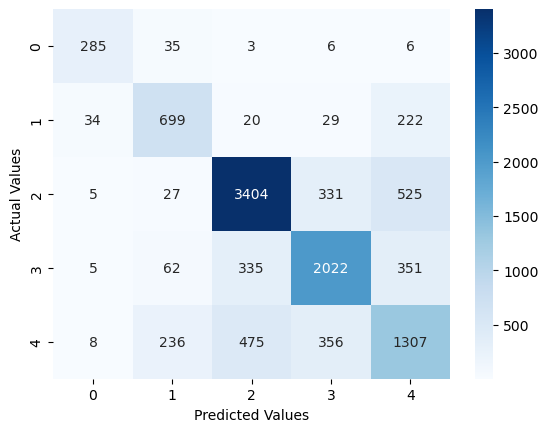

In [59]:
# PLOT the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### 1.2. Random Forest Classifier (Bagging)

In [60]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [61]:
# PREDICT the test data
y_pred = rf.predict(X_test)

In [62]:
# Evaluaete the Random Forest model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7875417130144605
Precision Score: 0.7813748076685049
Recall Score: 0.7875417130144605
F1 Score: 0.7812099375280837

Confusion Matrix:
 [[ 302   20    3    7    3]
 [  22  714   23   37  208]
 [   2   12 3935  167  176]
 [   0   19  303 2259  194]
 [   4  143  503  446 1286]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.79      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.69      0.54      0.61      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788



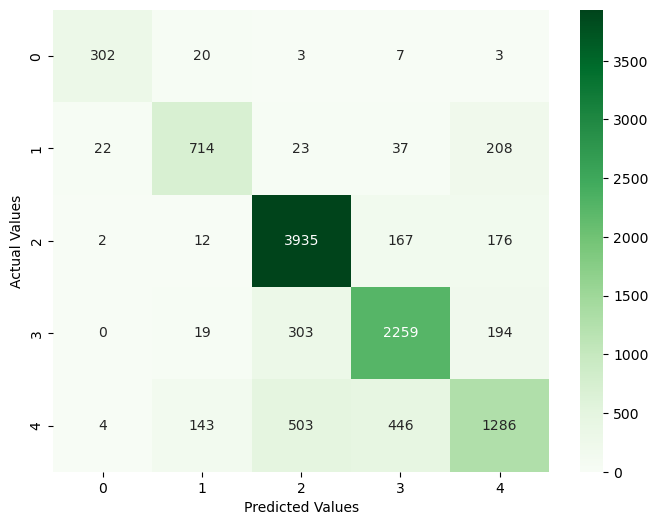

In [63]:
# PLOT the confusion matrix for Random Forest Model
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


### 1.3. Train the XGBoost Model

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
# PREDICT the test data
y_pred = xgb.predict(X_test)

In [66]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8017241379310345
Precision Score: 0.7975267711748084
Recall Score: 0.8017241379310345
F1 Score: 0.7974310299960653

Confusion Matrix:
 [[ 303   20    3    6    3]
 [  22  721   16   21  224]
 [   1   10 3946  158  177]
 [   3    7  304 2257  204]
 [   3  130  513  314 1422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       335
           1       0.81      0.72      0.76      1004
           2       0.83      0.92      0.87      4292
           3       0.82      0.81      0.82      2775
           4       0.70      0.60      0.64      2382

    accuracy                           0.80     10788
   macro avg       0.81      0.79      0.80     10788
weighted avg       0.80      0.80      0.80     10788



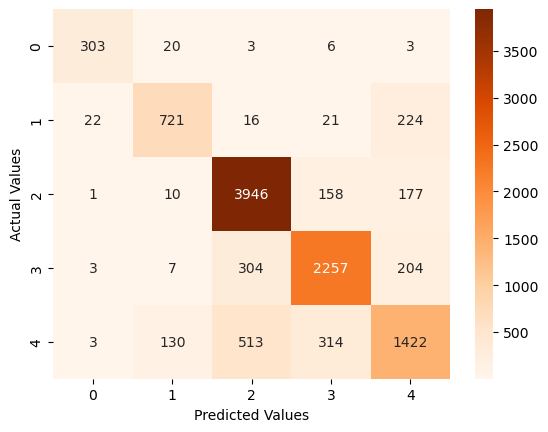

In [67]:
# PLOT the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

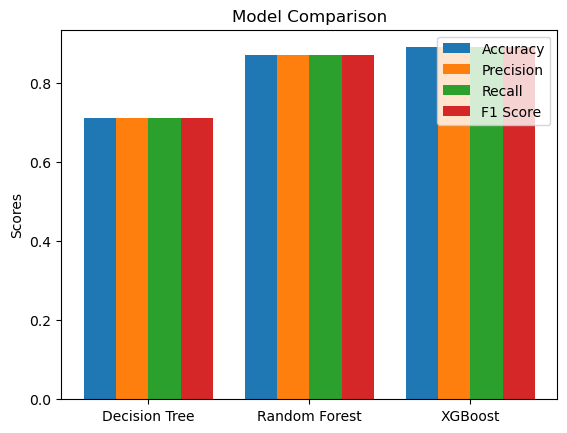

In [68]:
# Make a bar plot to compare the three models
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [0.71, 0.87, 0.89]
precision = [0.71, 0.87, 0.89]
recall = [0.71, 0.87, 0.89]
f1 = [0.71, 0.87, 0.89]
x = np.arange(len(models))
width = 0.2
plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')
plt.bar(x + width*1.5, f1, width, label='F1 Score')
plt.xticks(x, models)
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()

## Assignment : Compare the models for regression problem using the same algorithms. 


Mean Absolute Error (MAE): 0.33416759362254356
Mean Absolute Percentage Error (MAPE): 23377973594062.797
R-squared (R2 ) Score: 0.36300208882337404
Mean Squared Error (MSE): 0.6765850945494994
Root Mean Squared Error (RMSE): 0.8225479284208911


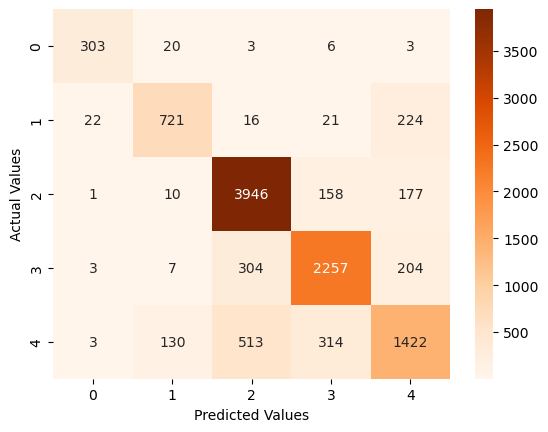

In [69]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
# 1.2. Train the Random Forest Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# 1.3. Train the XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# PREDICT the test data
y_pred = xgb.predict(X_test)
# Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred))
print("R-squared (R2 ) Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
# PLOT the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

